#### Name: Sumanasekara W.K.G.G.
#### Index: 190610E

### - Blobs

In [89]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

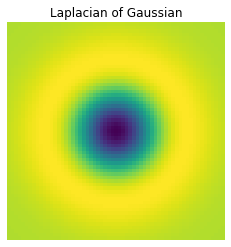

In [90]:
sigma = 10
hw = 3*sigma

XX, YY = np.meshgrid(np.arange(-hw, hw+1, 1), np.arange(-hw, hw+1, 1))
LoG = 1/(2*np.pi*sigma**2)*(XX**2/(sigma**2) + YY**2/(sigma**2) -2)*np.exp(-(XX**2 + YY**2)/(2*sigma**2))

plt.imshow(LoG)
plt.title("Laplacian of Gaussian")
plt.axis("off")
plt.show()


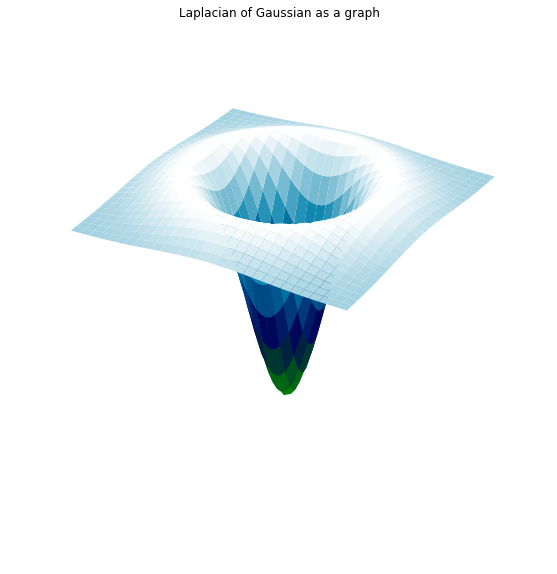

In [91]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(XX, YY, LoG, cmap=cm.ocean, linewidth=0, antialiased=True)
ax.zaxis.set_major_locator(LinearLocator(10))
plt.title("Laplacian of Gaussian as a graph")
plt.axis("off")
plt.show()

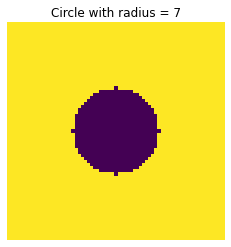

In [92]:
h, w = 71, 71
hh, hw = h//2, w//2
radius = w//5

circle = np.ones((h, w), dtype=np.float32)*255
XX, YY = np.meshgrid(np.arange(-hh, hh+1, 1), np.arange(-hw, hw+1, 1)) 
circle *= XX**2+YY**2 > radius**2

plt.imshow(circle)
plt.axis("off")
plt.title("Circle with radius = 7")
plt.show()

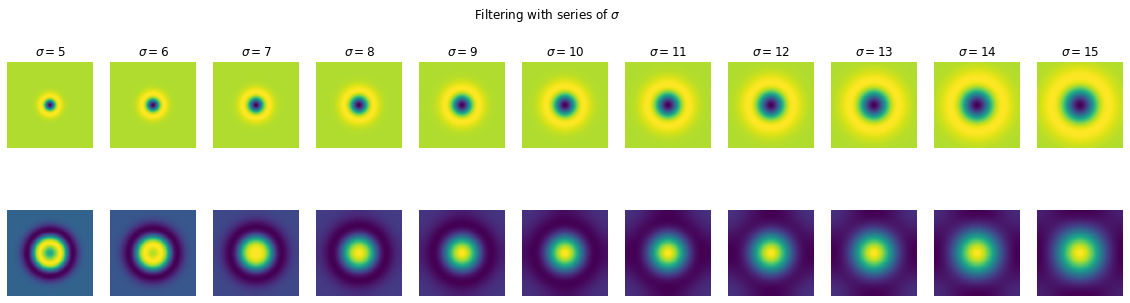

In [93]:
sigmas = np.arange(5, 16, 1)
sigma_count = len(sigmas)
scale_space = np.empty((h, w, sigma_count), dtype=np.float32)
log_wh = 3*np.max(sigmas)
XX, YY = np.meshgrid(np.arange(-log_wh, log_wh+1, 1), np.arange(-log_wh, log_wh+1, 1))
fig, ax = plt.subplots(2, sigma_count, figsize=(20, 5))

for i, sigma in enumerate(sigmas):
    LoG = 1/(2*np.pi*sigma**2)*(XX**2/(sigma**2) + YY**2/(sigma**2) -2)*np.exp(-(XX**2 + YY**2)/(2*sigma**2))
    circle_filtered = cv.filter2D(circle, -1, LoG)
    scale_space[:, :, i] = circle_filtered

    ax[0, i].set_title("$\sigma = {}$".format(sigma))
    ax[0, i].imshow(LoG)
    ax[0, i].axis("off")  
    ax[1, i].imshow(circle_filtered)
    ax[1, i].axis("off") 

fig.suptitle("Filtering with series of $\sigma$")  
plt.show()


In [94]:
indices = np.unravel_index(np.argmax(scale_space, axis=None), scale_space.shape)
print("scale-space extremum = {}".format(sigmas[indices[2]]))

scale-space extremum = 10


Calculated $\sigma = \frac{14}{\sqrt{2}} \approx 10$

### - Fitting

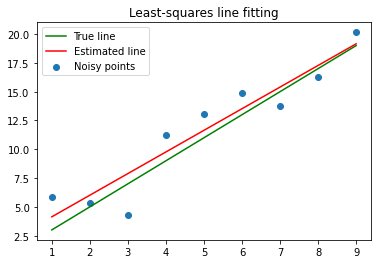

In [95]:
m, c = 2, 1
x = np.arange(1, 10, 1)
n = 2.*np.random.randn(len(x))
o = np.zeros(x.shape)
# o[-1] = 20
y = m*x + c + n + o

X = np.concatenate((x.reshape(len(x), 1), np.ones((len(x), 1))), axis=1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar, cstar = B[0], B[1]

plt.plot((x[0], x[-1]), (m*x[0]+c, m*x[-1]+c), 'g', label="True line")
plt.plot((x[0], x[-1]), (mstar*x[0]+cstar, mstar*x[-1]+cstar), 'r', label="Estimated line")
plt.scatter(x, y, label='Noisy points')
plt.legend(loc='best')
plt.title("Least-squares line fitting")
plt.show()

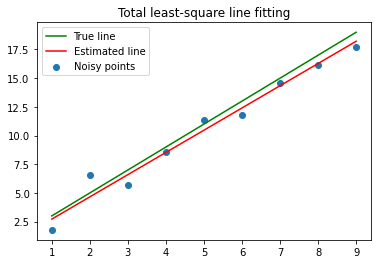

In [107]:
m, c = 2, 1
x = np.arange(1, 10, 1)
n = 2.*np.random.randn(len(x))
o = np.zeros(x.shape)
# o[-1] = 20
y = m*x + c + n + o

u11 = np.sum((x-np.mean(x))**2)
u12 = np.sum((x-np.mean(x))*(y-np.mean(y)))
u21 = u12
u22 = np.sum((y-np.mean(y))**2)

U = np.array(((u11, u12), (u21, u22)))
W, V = np.linalg.eig(U)
ev_of_smallest_ef = V[:, np.argmin(W)]
a, b = ev_of_smallest_ef[0], ev_of_smallest_ef[1]
d = a*np.mean(x) + b*np.mean(y)

mstar, cstar = -a/b, d/b

plt.plot((x[0], x[-1]), (m*x[0]+c, m*x[-1]+c), 'g', label="True line")
plt.plot((x[0], x[-1]), (mstar*x[0]+cstar, mstar*x[-1]+cstar), 'r', label="Estimated line")
plt.scatter(x, y, label='Noisy points')
plt.legend(loc='best')
plt.title("Total least-square line fitting")
plt.show()

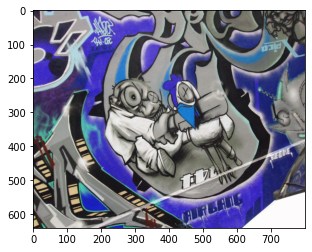

In [106]:
img = cv.imread("graffiti\img2.ppm")
plt.imshow(img)